In [39]:
import re
import os
def getEpochLoss(data):
    pattern = r"Epoch (\d+)/\d+,\sLoss: ([\d.]+)"
    matches = re.findall(pattern, data)
    if matches:
        epoch = matches[0][0]
        loss = matches[0][1]
        return epoch,loss
    return None,None

log_folder = '../log'
# 获取log文件夹下的所有文件
log_files = [f for f in os.listdir(log_folder) if os.path.isfile(os.path.join(log_folder, f))]
dict = {}
for file_name in log_files:
    parts = file_name.split("_")
    if file_name.count('_') != 5: continue
    file_path = os.path.join(log_folder, file_name)
    new_key_name = "_".join(parts[:4])
    if new_key_name not in dict:
        dict[new_key_name] = []
    if 'loss' in file_name:
        with open(file_path, 'r') as file:
             lines = file.readlines()
             epoches = []
             losses = []
             for line in lines:
                 epoch,loss = getEpochLoss(line)
                 if epoch is not None and loss is not None:
                     epoches.append(epoch)
                     losses.append(loss)
             dict[new_key_name].append(losses)

print(dict)
data = []
epoch_num = len(dict[list(dict.keys())[0]][0])
for key in dict:
    parts = key.split("_")
    large_batch = int(parts[2])  # 提取大批量大小并将其转换为整数
    small_batch = int(parts[3])  # 提取小批量大小并将其转换为整数
    avg_down = len(dict[key])
    epoches = []
    print(key)
    print(dict[key])
    for i in range(epoch_num):
        cur = 0
        for j in range(len(dict[key])): # 5 avg 5
            cur += float(dict[key][j][i])
        cur /= len(dict[key])
        epoches.append(cur)
    data.append([[large_batch,small_batch],epoches])

print(data)

{'resnet50_cifar10_256_256': [['0.9716734735637295', '0.4072053570832525', '0.1882253357266285', '0.11122217751583274', '0.09067024611772931', '0.06399598444945045', '0.053395673067175915', '0.05011814484866906', '0.042803633022027054', '0.03438123797745995', '0.03435250318951297', '0.03600752657298379', '0.033358743518819005', '0.03416366990636654', '0.0277512049782375'], ['0.9581281871211772', '0.40497363206683373', '0.1927247222665013', '0.11108635472399848', '0.0805370829220177', '0.0650966674355524', '0.05487786867769853', '0.04032334504287918', '0.04276586776333196', '0.039860436835383276', '0.036803862997045626', '0.030020618911034296', '0.029023661481321086', '0.02673934406258774', '0.02759678229958066'], ['0.9547076161418643', '0.40558975570055905', '0.18604222742118398', '0.10982481137450252', '0.08806430209161979', '0.07419932667850232', '0.0561861273338448', '0.045889461959465125', '0.03614111147507341', '0.03913029418707046', '0.04217817301966478', '0.03489297638143584', '

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.9605956493895882, 0.4051664184854955, 0.18817164355090688, 0.11075177931663942, 0.08674900055463824, 0.0682372710876623, 0.05431627489635911, 0.04521700697570887, 0.042052061543609874, 0.03892809951426081, 0.03708577516574261, 0.03357491404511871, 0.027896595484700658, 0.02966110649582816, 0.02916602681982521]
[0.981686341686322, 0.4373472740506882, 0.22742375236414278, 0.13362783589555174, 0.0963621043507248, 0.07521149563267256, 0.06228563074603714, 0.055249556455322923, 0.04609077639884942, 0.041448891264579416, 0.039647031921174025, 0.03618296161419034, 0.032042139713578596, 0.03312862403518127, 0.029324025861249613]
[1.0308139695078515, 0.5044251752555218, 0.30794694126414524, 0.1955858561074566, 0.13580626775808344, 0.10159148292049118, 0.08009464624540313, 0.068815690015688, 0.06030900392245473, 0.05017524921827142, 0.04860370756740875, 0.04246605443119136, 0.03738168771448665, 0.036223822919627446, 0.033243196564601486]
[1.

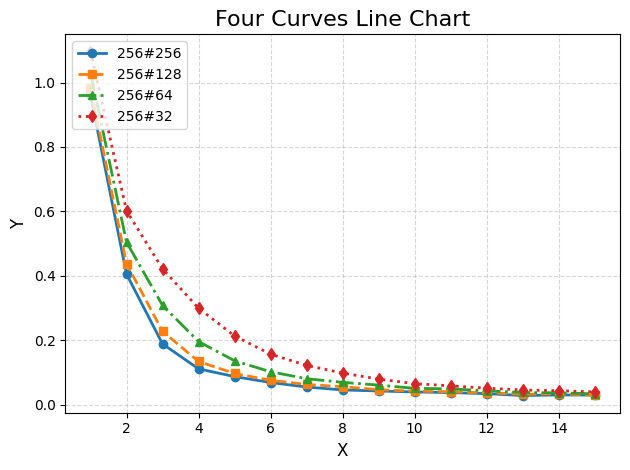

In [40]:
import matplotlib.pyplot as plt
# # test 曲线数据
# x = [1, 2, 3, 4, 5]  # x轴数据
# y1 = [1, 4, 9, 16, 25]  # 曲线1的y轴数据
# y2 = [1, 2, 4, 8, 16]  # 曲线2的y轴数据
# y3 = [1, 3, 5, 7, 9]  # 曲线3的y轴数据
# y4 = [2, 4, 6, 8, 10]  # 曲线4的y轴数据
x = [i for i in range(1,epoch_num+1)]
y1 = [float(x) for x in data[0][1]]
y2 = [float(x) for x in data[1][1]]
y3 = [float(x) for x in data[2][1]]
y4 = [float(x) for x in data[3][1]]
print(x)
print(y1)
print(y2)
print(y3)
print(y4)

# 绘制折线图
plt.plot(x, y1, label=f'{data[0][0][0]}#{data[0][0][1]}', marker='o', linestyle='-', linewidth=2)
plt.plot(x, y2, label=f'{data[1][0][0]}#{data[1][0][1]}', marker='s', linestyle='--', linewidth=2)
plt.plot(x, y3, label=f'{data[2][0][0]}#{data[2][0][1]}', marker='^', linestyle='-.', linewidth=2)
plt.plot(x, y4, label=f'{data[3][0][0]}#{data[3][0][1]}', marker='d', linestyle=':', linewidth=2)

# 图表标题和坐标轴标签
plt.title('Four Curves Line Chart', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

# 坐标轴刻度标签字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 设置图例位置和样式
plt.legend(loc='upper left', fontsize=10)

# 网格线
plt.grid(True, linestyle='--', alpha=0.5)

# 调整图表边距
plt.tight_layout()

plt.savefig('loss.pdf')

# 显示图表
plt.show()
